# ViennaRNA Workshop
Elnaz Farokhi

Dr.Rezazadegan

This workshop introduces the ViennaRNA package for RNA secondary structure prediction and analysis in Python.

## Table of Contents
1. [Introduction and Setup](#introduction)
2. [Basic RNA Folding](#basic-folding)
3. [Minimum Free Energy (MFE) Structures](#mfe)
4. [Partition Function and Base Pair Probabilities](#partition)
5. [Boltzmann Sampling](#boltzmann)
6. [RNA-RNA Interaction](#interaction)

## 1. Introduction and Setup {#introduction}

ViennaRNA is a comprehensive software package for RNA secondary structure prediction and analysis. The Python bindings allow us to use these powerful tools programmatically.

### Installation
```bash
pip install viennarna
# or
conda install -c bioconda viennarna
```


In [1]:
import RNA
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt



## 2. Basic RNA Folding {#basic-folding}

The simplest way to predict RNA secondary structure is using the `RNA.fold()` function, which returns the minimum free energy (MFE) structure and its energy.


In [ ]:

sequence = "GGCGAAGUUCGCCGAUGCAAGCUUCGGC"

# Fold the sequence
structure, mfe = RNA.fold(sequence)

print(f"Sequence: {sequence}")
print(f"Structure: {structure}")
print(f"Minimum Free Energy: {mfe:.2f} kcal/mol")


Sequence: GGCGAAGUUCGCCGAUGCAAGCUUCGGC
Structure: (.(((((((.((....)).))))))).)
Minimum Free Energy: -10.60 kcal/mol


### Understanding Dot-Bracket Notation

The structure is represented in **dot-bracket notation**:
- `.` = unpaired base
- `(` = opening base pair
- `)` = closing base pair
- `[`, `]` = different types of base pairs in complex structures


In [3]:

tRNA_seq = "GGGCGAAUCCUCAGUUGGGAGAGCGCCAGACUGAAGAUCUGGAGGUCCUGUGUUCGAUCCACAGAAUUCGCACCA"

structure, mfe = RNA.fold(tRNA_seq)

print(f"Sequence length: {len(tRNA_seq)}")
print(f"Structure: {structure}")
print(f"MFE: {mfe:.2f} kcal/mol")


Sequence length: 75
Structure: ((((((((..((.((.(((.((((((..((((...........))))..))))))..))))).)))))))).)).
MFE: -25.70 kcal/mol


## 3. Minimum Free Energy (MFE) Structures {#mfe}

We can also use the `RNA.mfe()` function for more detailed MFE calculations, or work with RNA objects for more control.


In [4]:
# Using RNA object for more control
sequence = "AUGCGAAGUUCGCCGAUGCAAGCUUCGCAU"

# Create an RNA object
fc = RNA.fold_compound(sequence)

# Compute MFE
mfe, structure = fc.mfe()

print(f"Sequence: {sequence}")
print(f"Structure: {structure}")



Sequence: AUGCGAAGUUCGCCGAUGCAAGCUUCGCAU
Structure: -14.399999618530273


## 4. Partition Function and Base Pair Probabilities {#partition}

The partition function allows us to compute the probability of each base pair forming, which gives us a more realistic picture than just the MFE structure.


In [5]:

sequence = "GGCGAAGUUCGCCGAUGCAAGCUUCGGC"
fc = RNA.fold_compound(sequence)

# partition function
pf = fc.pf()

# Get base pair probability matrix
bpp_matrix = fc.bpp()

print(f"Sequence: {sequence}")
print(f"Partition function (log): {pf}")
print(f"\nBase pair probability matrix shape: {bpp_matrix}")

# Find base pairs with probability > 0.1
print("\nBase pairs with probability > 0.1:")
for i in range(len(sequence)):
    for j in range(i+1, len(sequence)):
        if bpp_matrix[i][j] > 0.1:
            print(f"  {i+1}-{j+1}: {bpp_matrix[i][j]:.3f} ({sequence[i]}-{sequence[j]})")


Sequence: GGCGAAGUUCGCCGAUGCAAGCUUCGGC
Partition function (log): ['(.(((((((.((....)).))))))).)', -10.803990364074707]

Base pair probability matrix shape: ((0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.8877218526236292e-06, 6.29964356059292e-05, 0.0004059009785668302, 0.0, 3.601050373279123e-07, 0.012972644636456719, 0.0, 0.0, 1.0844139157468966e-08, 0.0, 6.296435220557361e-08, 0.0, 0.0, 0.0, 5.317916261294888e-09, 5.542703276805794e-07, 1.9394230470906338e-09, 7.019426006190447e-07, 0.0, 0.0, 0.7754444229965276), (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00015614451153368595, 0.0002482085365795598, 1.1767297068533842e-05, 0.0, 0.01320603022839392, 1.1022202379855252e-07, 0.0, 0.0, 1.0026198935162268e-09, 0.0, 9.888401880246751e-08, 0.0, 0.0, 0.0, 7.392164407538866e-07, 3.1497548175520556e-10, 3.665395508815586e-07, 6.98410163665481e-07, 0.0,

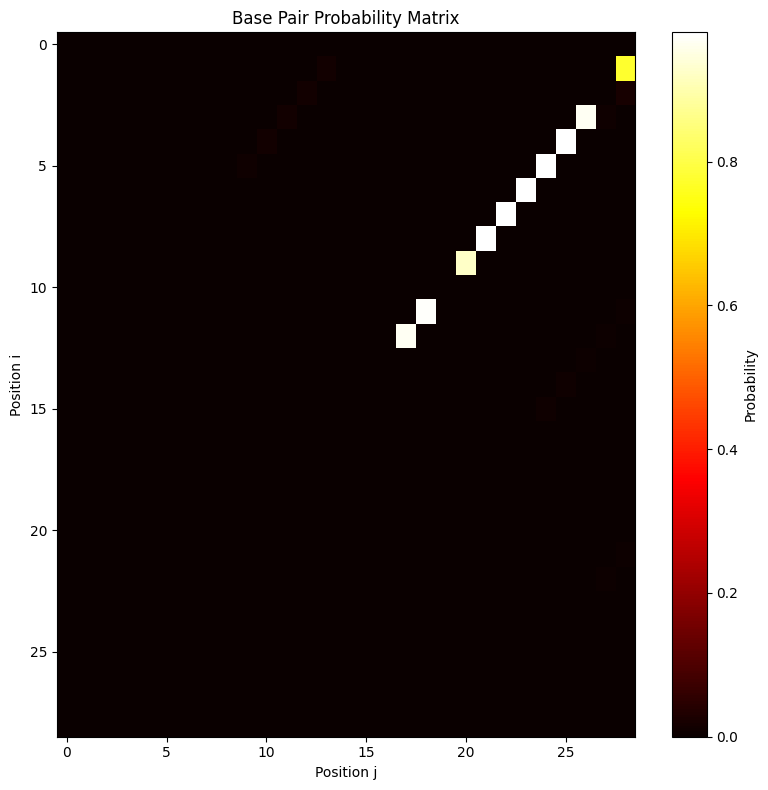

In [6]:
# Visualize base pair probabilities
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(bpp_matrix, cmap='hot', interpolation='nearest', aspect='auto')
ax.set_xlabel('Position j')
ax.set_ylabel('Position i')
ax.set_title('Base Pair Probability Matrix')
plt.colorbar(im, ax=ax, label='Probability')
plt.tight_layout()
plt.show()


### Centroid Structure

The centroid structure is the structure with the smallest average base pair distance to all other structures, weighted by their probabilities.


In [29]:
# Compute centroid structure
sequence = "GGCGAAGUUCGCCGAUGCAAGCUUCGGC"
fc = RNA.fold_compound(sequence)
fc.pf()  # Compute partition function first

# Get centroid structure
centroid = fc.centroid()

print(f"Sequence: {sequence}")
print(f"MFE structure: {RNA.fold(sequence)[0]}")
print(f"Centroid structure: {centroid}")


Sequence: GGCGAAGUUCGCCGAUGCAAGCUUCGGC
MFE structure: (.(((((((.((....)).))))))).)
Centroid structure: ['(.(((((((.((....)).))))))).)', 0.6545978296578907]


## 5. Boltzmann Sampling 

Boltzmann sampling is a powerful technique in bioinformatics for generating RNA secondary structures according to their thermodynamic probabilities. Unlike MFE prediction which gives only the most stable structure, or suboptimal enumeration which gives structures within an energy range, Boltzmann sampling generates structures with probabilities proportional to their Boltzmann weights


In [ ]:

sequence = "GGCGAAGUUCGCCGAUGCAAGCUUCGGC"

md = RNA.md()
md.uniq_ML = 1  #0 or 1
fc = RNA.fold_compound(sequence, md)

fc.pf()

num_samples = 100
samples = []

for i in range(num_samples):
    structure = fc.pbacktrack()
    if structure:
        samples.append(structure)
    else:
        
        structure = fc.pbacktrack5()
        samples.append(structure)

print(f"Sequence: {sequence}")
print(f"Generated {num_samples} structures using Boltzmann sampling")
print(f"\nFirst 10 sampled structures:")
for i, struct in enumerate(samples[:10], 1):
    print(f"{i}. {struct}")
    


Sequence: GGCGAAGUUCGCCGAUGCAAGCUUCGGC
Generated 100 structures using Boltzmann sampling

First 10 sampled structures:
1. (.(((((((.((....)).))))))).)
2. ..(((((((.((....)).)))))))..
3. (.(((((((.((....)).))))))).)
4. (.(((((((.((....)).))))))).)
5. (.(((((((.((....)).))))))).)
6. (.((((((..((....))..)))))).)
7. ..(((((((.((....)).)))))))..
8. (.(((((((.((....)).))))))).)
9. (((((...)))))((........))...
10. (.(((((((.((....)).))))))).)


In [ ]:
# Generate suboptimal structures
sequence = "GGCGAAGUUCGCCGAUGCAAGCUUCGGC"
fc = RNA.fold_compound(sequence)

mfe, mfe_structure = fc.mfe()

# Generate suboptimal structures within 5 kcal/mol of MFE
subopt_structures = fc.subopt(5)

print(f"Sequence: {sequence}")
print(f"MFE: {mfe} kcal/mol")
print(f"MFE Structure: {mfe_structure}")
print(f"\nFound {len(subopt_structures)} suboptimal structures within 5 kcal/mol:")
print("\nTop 10 suboptimal structures:")
for i, structure in enumerate(subopt_structures[:10], 1):
    print(f"{i}. {structure}")


Sequence: GGCGAAGUUCGCCGAUGCAAGCUUCGGC
MFE: (.(((((((.((....)).))))))).) kcal/mol
MFE Structure: -10.600000381469727

Found 1 suboptimal structures within 5 kcal/mol:

Top 10 suboptimal structures:
1. { structure: "(.(((((((.((....)).))))))).)", energy: -10.6 }


## 6. RNA-RNA Interaction {#interaction}

ViennaRNA can predict interactions between two RNA molecules, which is crucial for understanding RNA-RNA binding, miRNA-target interactions, etc.


In [39]:
# RNA-RNA interaction prediction
seq1 = "GGCGAAGUUCGCCGAUGCAAGCUUCGGC"
seq2 = "AUGCAAGCUUCGGC"

# Predict interaction
result = RNA.cofold(seq1, seq2)

print(f"Sequence 1: {seq1}")
print(f"Sequence 2: {seq2}")
print(f"\nInteraction energy: {result[0]} kcal/mol")
print(f"Structure 1: {result[0]}")
print(f"Structure 2: {result[1]}")


Sequence 1: GGCGAAGUUCGCCGAUGCAAGCUUCGGC
Sequence 2: (.(((((((.((..

Interaction energy: (.(((((((.((....)).))))))).) kcal/mol
Structure 1: (.(((((((.((....)).))))))).)
Structure 2: -10.600000381469727


In [41]:
# More detailed interaction analysis
seq1 = "GGCGAAGUUCGCCGAUGCAAGCUUCGGC"
seq2 = "AUGCAAGCUUCGGC"

# Predict interaction with detailed output
interaction_result = RNA.co_pf_fold(seq1, seq2)

print(f"Interaction MFE: {interaction_result[0]} kcal/mol")
print(f"Structure 1: {interaction_result[1]}")
print(f"Structure 2: {interaction_result[2]}")


Interaction MFE: (.(((((((.((....)).))))))).) kcal/mol
Structure 1: -10.803990364074707
Structure 2: -10.803990364074707
